/tmp/ipykernel_9684/3567741098.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


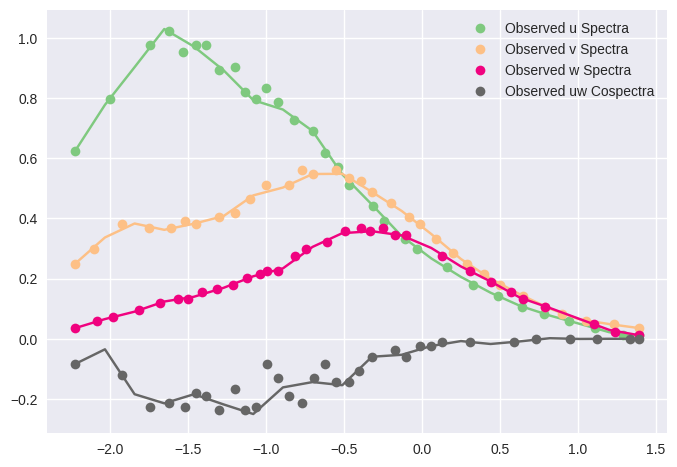

In [31]:
import numpy as np 
import csv
from pathlib import Path 

import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.style.use('seaborn')

from scipy.interpolate import interp1d, barycentric_interpolate, CubicSpline
from sklearn.metrics import mean_squared_error
# === Data Loading ===
# print(Path().resolve())
def extract_x_spectra(filepath):
    x, spectra = [], [] 
    with open(filepath) as spectra_csv: 
        csv_reader = csv.reader(spectra_csv, delimiter=',')
        for row in csv_reader:
            x.append(float(row[0])) 
            spectra.append(float(row[1])) 

    return np.log10(np.array(x)), np.array(spectra)

def interp_spectra(x_interp, x_true, spectra): 
    cs = CubicSpline(x_true, spectra)
    
    return cs(x_interp) 

x_coords_u, u_spectra = extract_x_spectra(Path().resolve() / "data" / "u_spectra.csv")
x_coords_v, v_spectra = extract_x_spectra(Path().resolve() / "data" / "v_spectra.csv")
x_coords_w, w_spectra = extract_x_spectra(Path().resolve() / "data" / "w_spectra.csv")
x_coords_uw, uw_cospectra = extract_x_spectra(Path().resolve() / "data" / "uw_cospectra.csv")

x_interp = np.linspace(min(x_coords_w), max(x_coords_w), 20)
# x_interp = np.linspace(-2, 2, 20)

# y_interp = barycentric_interpolate(x_coords_w, w_spectra, x_interp)
interp_u = interp_spectra(x_interp, x_coords_u, u_spectra)
interp_v = interp_spectra(x_interp,x_coords_v, v_spectra)
interp_w = interp_spectra(x_interp, x_coords_w, w_spectra)
interp_uw = interp_spectra(x_interp,x_coords_uw, uw_cospectra)

# cs = CubicSpline(x_coords_w, w_spectra)
# y_interp = cs(x_interp)
# y_cs_true = cs(x_coords_u)
# cmap = mpl.cm.get_cmap('Spectral')
cmap = plt.get_cmap('Accent', 4)
custom_palette = [mpl.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
plt.plot(x_coords_u, u_spectra, "o", label="Observed u Spectra", color=custom_palette[0])
plt.plot(x_interp, interp_u, color=custom_palette[0])
plt.plot(x_coords_v, v_spectra, "o", label="Observed v Spectra", color=custom_palette[1])
plt.plot(x_interp, interp_v, color=custom_palette[1])
plt.plot(x_coords_w, w_spectra, "o", label="Observed w Spectra", color=custom_palette[2])
plt.plot(x_interp, interp_w, color=custom_palette[2])
plt.plot(x_coords_uw, uw_cospectra, "o", label="Observed uw Cospectra", color=custom_palette[3])
plt.plot(x_interp, interp_uw, color=custom_palette[3])

# mse_interp = mean_squared_error(y_cs_true, w_spectra)
# plt.yscale('log')
# plt.xscale('log')
# plt.title(f"MSE of Interpolant = {mse_interp}")
plt.legend()